In [2]:
import tensorflow as tf
from autoencoders.vanilla_autoencoders import AUTOENCODER_300_150_300
from autoencoders.vanilla_autoencoders import AUTOENCODER_150
from autoencoders.vanilla_autoencoders import AUTOENCODER_50


from home.pn.PycharmProjects.autoencoders.helper_functions import *

In [3]:
train_data, test_data, m = get_mnist_data()

Getting MNIST data..
Retrieved MNIST data


## 784-300-150-300-784

Number of Epochs = 5
Train Loss:  4.2965525e+21
Test Loss:  4.2965525e+21


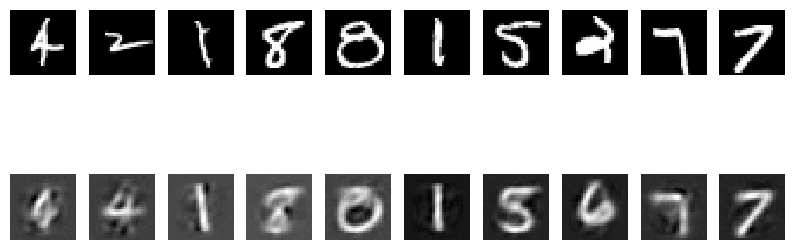

Number of Epochs = 20
Train Loss:  7.6877853e+21
Test Loss:  7.6877853e+21


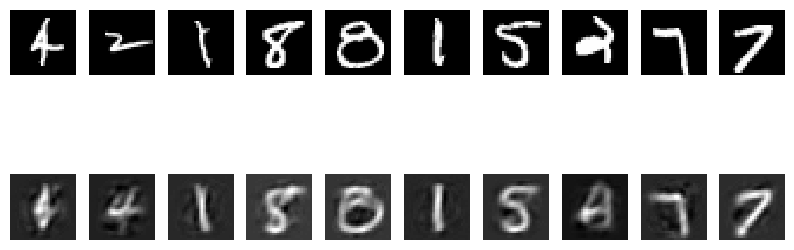

Number of Epochs = 50
Train Loss:  1.0559445e+17
Test Loss:  1.0559445e+17


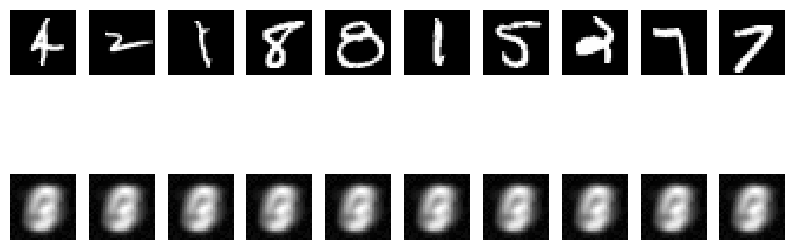

In [24]:
experimental_tasks1 = []
settings = [(5, 0.0001), (20, 0.0001), (50, 0.0001)]
#train_data, test_data, m = get_mnist_data()

for (num_epochs, l2_reg) in settings:

    model = AUTOENCODER_300_150_300()

    init = tf.global_variables_initializer()

    #Train
    train_loss, test_loss = [], []
    batch_size = 200
    with tf.Session()   as sess:
        init.run()
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
        print("Number of Epochs = " + str(num_epochs))
        for epoch in range(num_epochs):
            print("Epoch: " + str(epoch) + "/" + str(num_epochs), end="\r")
            n_batches = m//batch_size
            for batch in range(n_batches):
                X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                sess.run(model.training_op, feed_dict={model.X: X_batch})
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

        reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

    experimental_tasks1.append(((num_epochs, l2_reg), train_loss, test_loss))

    print("Train Loss: ", train_loss[-1])
    print("Test Loss: ", test_loss[-1])
    plot_reconstructions(test_data[0: 10], reconstructions)

## 784-150-784

Number of Epochs = 5
Train Loss:  1694.8524
Test Loss:  1692.8363


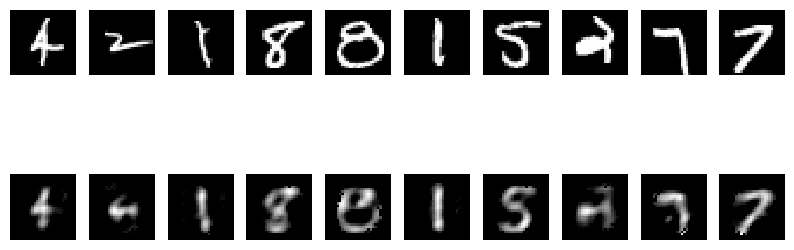

Number of Epochs = 20
Train Loss:  8.936084e+22
Test Loss:  8.936084e+22


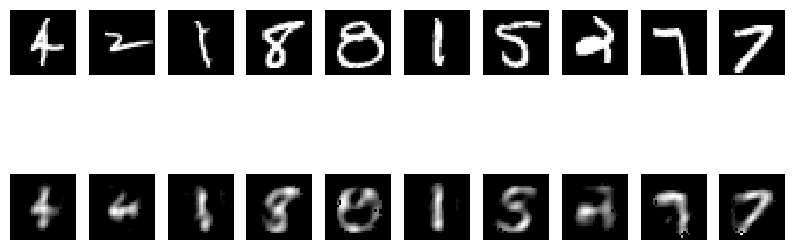

Number of Epochs = 50
Train Loss:  2.481098e+18
Test Loss:  2.481098e+18


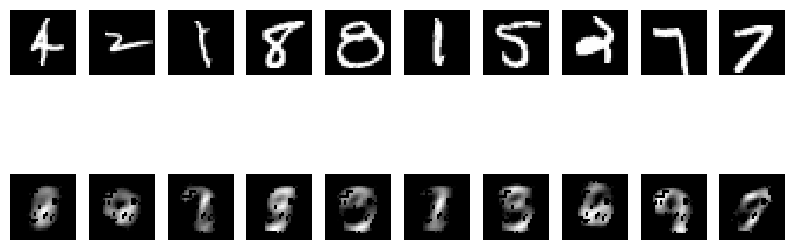

In [23]:
experimental_tasks2 = []
settings = [(5, 0.0001), (20, 0.0001), (50, 0.0001)]
#train_data, test_data, m = get_mnist_data()

for (num_epochs, l2_reg) in settings:

    model = AUTOENCODER_150()

    init = tf.global_variables_initializer()

    #Train
    train_loss, test_loss = [], []
    batch_size = 200
    with tf.Session()   as sess:
        init.run()
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
        print("Number of Epochs = " + str(num_epochs))
        for epoch in range(num_epochs):
            print("Epoch: " + str(epoch) + "/" + str(num_epochs), end="\r")
            n_batches = m//batch_size
            for batch in range(n_batches):
                X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                sess.run(model.training_op, feed_dict={model.X: X_batch})
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

        reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

    experimental_tasks2.append(((num_epochs, l2_reg), train_loss, test_loss))

    print("Train Loss: ", train_loss[-1])
    print("Test Loss: ", test_loss[-1])
    plot_reconstructions(test_data[0: 10], reconstructions)

## 784-50-784

Number of Epochs = 5
Train Loss:  5335.5757
Test Loss:  5339.4546


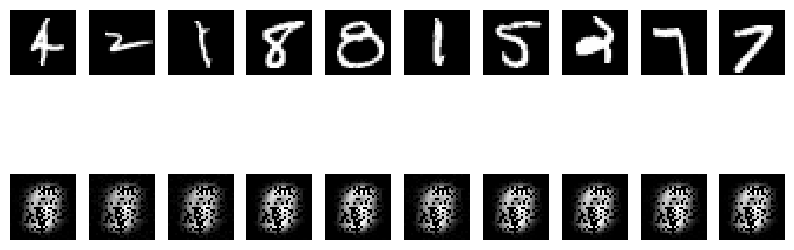

Number of Epochs = 20
Train Loss:  4952.8735
Test Loss:  4952.398


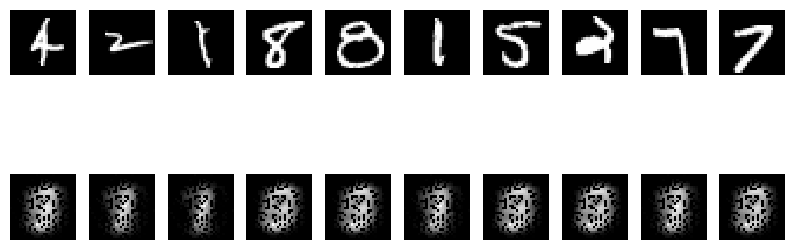

Number of Epochs = 50
Train Loss:  nan
Test Loss:  nan


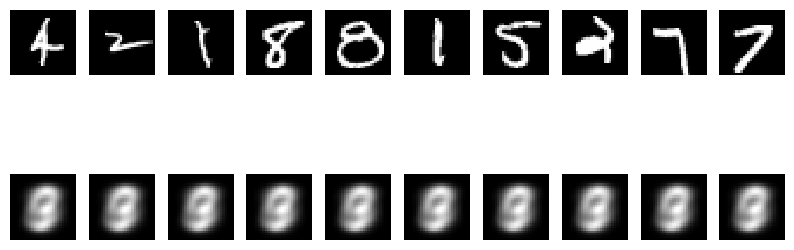

In [22]:
experimental_tasks3 = []
settings = [(5, 0.0001), (20, 0.0001), (50, 0.0001)]
#train_data, test_data, m = get_mnist_data()

for (num_epochs, l2_reg) in settings:

    model = AUTOENCODER_50()

    init = tf.global_variables_initializer()

    #Train
    train_loss, test_loss = [], []
    batch_size = 2000
    with tf.Session()   as sess:
        init.run()
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
        print("Number of Epochs = " + str(num_epochs))
        for epoch in range(num_epochs):
            print("Epoch: " + str(epoch) + "/" + str(num_epochs), end="\r")
            n_batches = m//batch_size
            for batch in range(n_batches):
                X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                sess.run(model.training_op, feed_dict={model.X: X_batch})
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

        reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

    experimental_tasks3.append(((num_epochs, l2_reg), train_loss, test_loss))

    print("Train Loss: ", train_loss[-1])
    print("Test Loss: ", test_loss[-1])
    plot_reconstructions(test_data[0: 10], reconstructions)

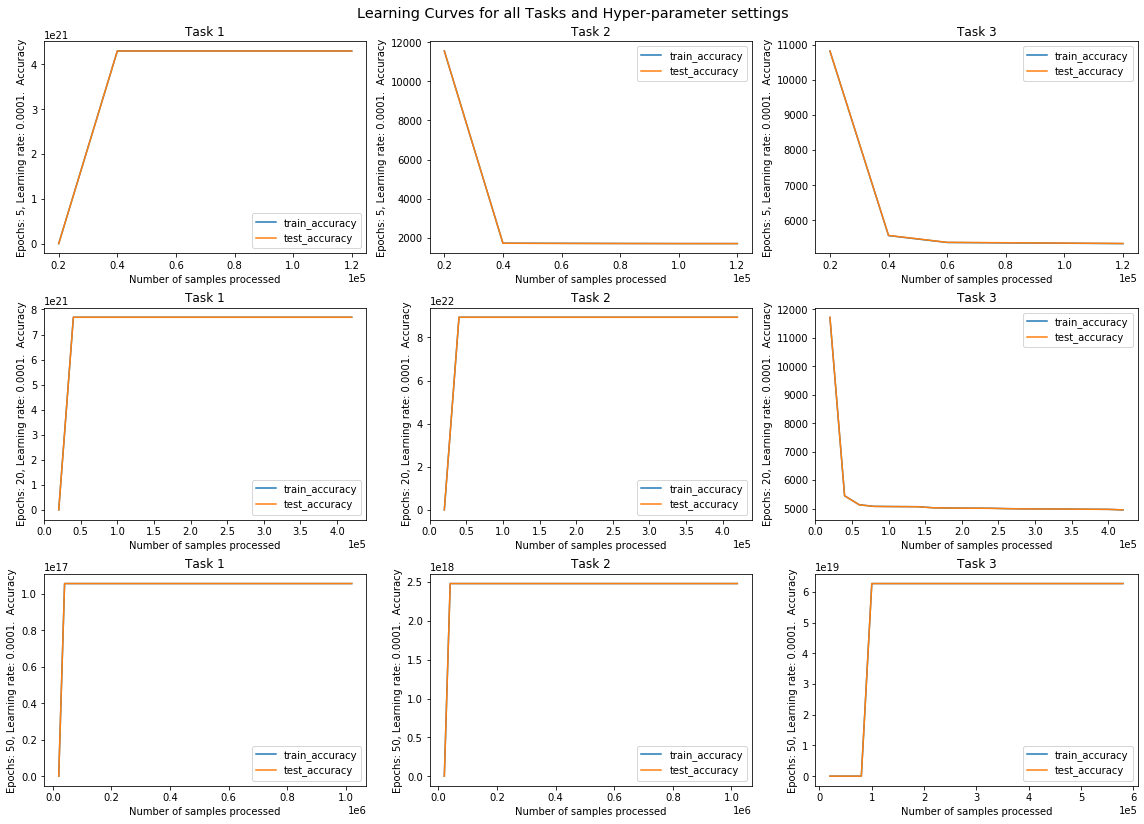

In [25]:
plot_learning_curves([experimental_tasks1, experimental_tasks2, experimental_tasks3])
#print(experimental_tasks2)

In [26]:
experimental_tasks2

[((5, 0.0001),
  [11560.08, 1713.5122, 1706.7377, 1700.2225, 1695.745, 1694.8524],
  [11560.845, 1710.368, 1703.9537, 1697.812, 1693.6627, 1692.8363]),
 ((20, 0.0001),
  [12016.307,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22],
  [12011.104,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22,
   8.936084e+22]),
 ((50, 0.0001),
  [11478.988,
   2.481098e+18,
   2.481098e+18,
   2.481098e+18,
   2.481098e+18,
   2.481098e+18,
   2.4